In [16]:
from glob import glob
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%pylab inline

RESULT_DIR = "../results/"

Populating the interactive namespace from numpy and matplotlib


/home/psch/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
result_files = glob(RESULT_DIR + "*.csv")
result_files

['../results/patrick-desktop.csv']

In [18]:
results = pd.read_csv(result_files[0], usecols=range(0,4))
results.head()

,name,iterations,real_time,cpu_time
0,daxpy_noblas/4,63296060,11.07450,11.03770
1,daxpy_noblas/16,108730311,6.36562,6.34461
2,daxpy_noblas/64,30457957,23.07900,23.00190
3,daxpy_noblas/256,7500918,92.97930,92.67320
4,daxpy_noblas/1024,1964244,358.99100,357.77000


In [19]:
results["Function"] = results.name.apply(lambda x: x.split("_")[0])
results["Length"] = results.name.apply(lambda x: int(x.split("/")[1]))
results["BLAS"] = results.name.apply(lambda x: "noblas" not in x)
results.head()

,name,iterations,real_time,cpu_time,Function,Length,BLAS
0,daxpy_noblas/4,63296060,11.07450,11.03770,daxpy,4,False
1,daxpy_noblas/16,108730311,6.36562,6.34461,daxpy,16,False
2,daxpy_noblas/64,30457957,23.07900,23.00190,daxpy,64,False
3,daxpy_noblas/256,7500918,92.97930,92.67320,daxpy,256,False
4,daxpy_noblas/1024,1964244,358.99100,357.77000,daxpy,1024,False


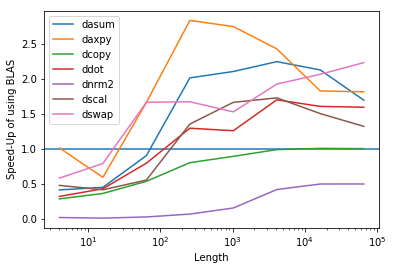

In [54]:
fig, ax = plt.subplots()
ax.axhline(y=1.)
ax.set_xlabel("Length")
ax.set_ylabel("Speed-Up of using BLAS")
for function, df in results.groupby("Function"):
    x = df[df.BLAS].Length.values
    y = df[df.BLAS == False].cpu_time.values / df[df.BLAS].cpu_time.values
    ax.semilogx(x, y, label=function)
    ax.legend()

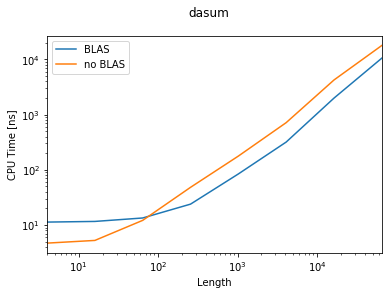

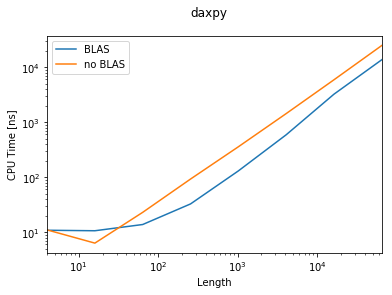

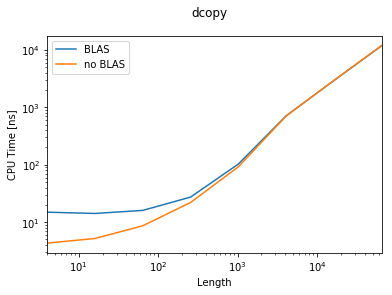

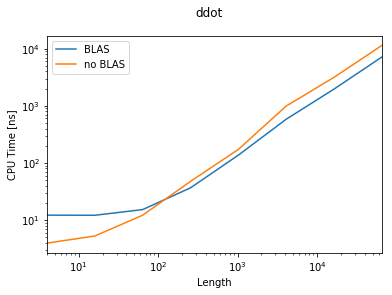

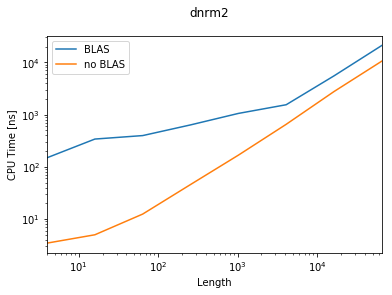

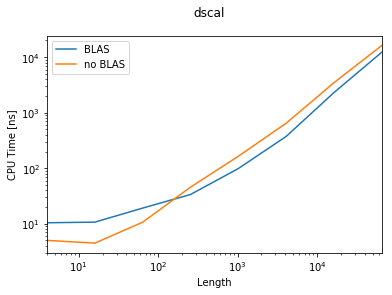

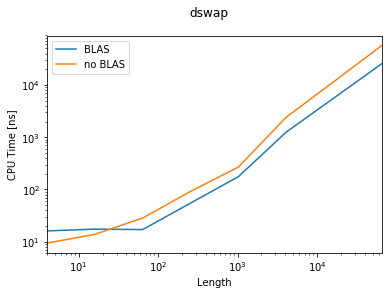

In [55]:
for function, df in results.groupby("Function"):
    fig, ax = plt.subplots()
    fig.suptitle(function)
    df[df.BLAS].plot(x="Length", y=TIME, label="BLAS", ax=ax)
    df[df.BLAS == False].plot(x="Length", y=TIME, label="no BLAS", ax=ax, logx=True, logy=True)
    ax.set_ylabel("CPU Time [ns]")    